### Import All required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Load all the csv files with suitable encoding format

In [4]:
### Using encoding format as ISO-8859-1, since it will remove the all junk characters and load data correctly
companies = pd.read_csv('companies.csv', encoding='ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv', encoding='ISO-8859-1')

#### Look for description of each data frame loaded like its count max,min etc...

In [5]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Cbd-Biosciences,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


#### Look for information of each column for each data frame loaded

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#### Finding Shape & Null count of each data frame loaded

#### For companies data set

In [9]:
companies.shape

(66368, 10)

In [10]:
companies.isnull().sum()

### We have found that there are lot of null values around the columns 
### founded_at, state_code, region, city, country_code, homepage_url

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

#### For rounds data set

In [11]:
rounds2.shape

(114949, 6)

In [12]:
rounds2.isnull().sum()

### We have found lots of null values found around the columns 
### funding_round_code, raised_amount_usd

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

# For Results Expected: Table 1.1

#### How many unique companies are present in rounds2?

In [13]:
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                  10
/ORGANIZATION/SEMPRIUS                     9
/ORGANIZATION/QUELLAN                      9
/organization/semprius                     9
/organization/exagen-diagnostics           9
                                          ..
/organization/healthcaresource             1
/organization/primaeva-medical             1
/ORGANIZATION/VISURE                       1
/ORGANIZATION/CARIBE-SPECTRUM-HOLDINGS     1
/organization/menias                       1
Name: company_permalink, Length: 90247, dtype: int64

#### On running the above command we will get the unique column value and its count
#### But we have found that company_permalink '/organization/quellan' and '/ORGANIZATION/QUELLAN' are actually same but 
#### differ in  the case sensitive. So, to get rid of such errors in counting the unique countries lets make them all same by converting #### them to lower case

In [14]:
### Converting the company permalink to lower case

### We can do this by applying the lambda function or by defining the function and calling it by applying on it

rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda permalink : permalink.lower())
rounds2['company_permalink'].value_counts()

/organization/solarflare            19
/organization/quellan               18
/organization/exagen-diagnostics    18
/organization/semprius              18
/organization/vocalocity            17
                                    ..
/organization/asset-insights         1
/organization/k2                     1
/organization/kiwigrid               1
/organization/shake-2                1
/organization/menias                 1
Name: company_permalink, Length: 66370, dtype: int64

#### Now, we can observe all of the permalinks are in lowercase and giving us the correct count of each individual company permalink

In [15]:
rounds2['company_permalink'].unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ...,
       '/organization/ã\x81eron', '/organization/ã\x94asys-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

#### Get the count of unique companies using company_permalink
#### And also lets correct data in permalink using decoding formatter of ANSI 

In [16]:
### Decoding using ASCII
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.company_permalink.unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/eron',
       '/organization/asys-2',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

#### Now we can see that no junk characters found in comapny permalinks

In [17]:
### Total unique comapnies
len(rounds2['company_permalink'].unique())

66368

## Therefore total unique companies in rounds2 is `66368`

#### How many unique companies are present in companies?

In [18]:
### We follow the same methodology that was followed in rounds2 dataset
companies.permalink.value_counts()

/Organization/Cbd-Biosciences               1
/Organization/Yoyo                          1
/Organization/Turbulenz                     1
/Organization/Kiwi-Wearable-Technologies    1
/Organization/Sport-Street                  1
                                           ..
/Organization/Respondent-Records            1
/Organization/Policyx                       1
/Organization/Medicalodges                  1
/Organization/Robotics-Inventions           1
/Organization/Capsule-Tech                  1
Name: permalink, Length: 66368, dtype: int64

#### Just for a safe side let us make all the permalink as lowercase and decode using ANSI so that it will be completely in sink with rounds2 data set

In [19]:
companies.permalink = companies.permalink.apply(lambda permalink : permalink.lower())
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [20]:
companies.permalink.unique()

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/eron',
       '/organization/asys-2',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

In [21]:
len(companies.permalink.unique())

66368

# Therefore total unique companies in companies data set is `66368`

### In the companies data frame, which column can be used as the unique key for each company?

In [22]:
companies.shape

(66368, 10)

In [23]:
total_rows_in_companies = (companies.shape)[0]
total_rows_in_companies

66368

#### If any column having the unique count as the number of rows in the dataset can be considered as unique in the data.
#### To find that let us use the following method to find the unique column

In [24]:
for column in companies.columns:
    unique_data_count_in_col = len(companies[column].unique())
    if unique_data_count_in_col == total_rows_in_companies:
        print(column, ":", unique_data_count_in_col);

permalink : 66368


In [25]:
### Reconfirmation of column(permalink) unique count 
len(companies.permalink.unique())

### 66368 is same as count of total rows in dataset

66368

# On the analysis we found that column `permalink` as unique and can be considered as the unique column in the companies dataset

### Are there any companies in the rounds2 file which are not present in companies?

In [26]:
# Since in rounds2 and companies dataset can be compared with  comapny_permalink and permalink respectively 
# to find the comapnies that are available in one data set and not in another data set

### To perform that task lets use two temporary datasets of companies permalink column and rounds2 company_peramlink
companies_permalink_data = companies.permalink
companies_permalink_data

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                   /organization/eron
66366                                 /organization/asys-2
66367    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: permalink, Length: 66368, dtype: object

In [27]:
### Similarly get the permalink data of companies from rounds2 dataset
rounds2_permalink_data = rounds2.company_permalink
rounds2_permalink_data

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                   /organization/eron
114947                                 /organization/asys-2
114948    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: company_permalink, Length: 114949, dtype: object

In [28]:
difference_permalinks_data = set(rounds2_permalink_data) - set(companies_permalink_data)
difference_permalinks_data

set()

# Therefore it was proved that there are no companies available that are available in round2 and not in companies. 
# Hence the answer is NO(N)

### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [29]:
### Merging two data sets

### Merge can be done using common column on both the datasets by left/right/outer join.
### In this we use left join on columns company_permalink and permalink of datasets since, they are the common columns

master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink', how = 'left')
master_frame.shape

(114949, 16)

In [30]:
masterFrame_total_observations = (master_frame.shape)[0]
masterFrame_total_observations

114949

# Total observations in master_frame are `114949`

#### Lets clean data before going to the further analysis

In [31]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

#### Above we can see columns required for analysis are `company_permalink, raised_amount_usd, category_list, country_code, name, funding_round_type` so we can drop other un necessary columns. 
#### So, that we can analyze on remaining data

In [32]:
columns_not_required = ['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url', 'state_code', 'region', 'city', 'founded_at','status']
master_frame = master_frame.drop(columns_not_required, axis=1) ### Dropping columns that are not required 
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   114949 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   raised_amount_usd   94959 non-null   float64
 3   name                114948 non-null  object 
 4   category_list       111539 non-null  object 
 5   country_code        106271 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


#### Now, let us observe the columns having percentage of null data

In [33]:
round((master_frame.isnull().sum()/masterFrame_total_observations)*100,2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64

#### Since, columns category_list & country_code are having less percentage of null values and we can't impute them just by guessing or using mode so, let us drop those records whose category_list or country_code is null and lets check again

In [34]:
master_frame = master_frame[~(master_frame['country_code'].isnull() |master_frame['category_list'].isnull())]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104532 entries, 0 to 114947
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   104532 non-null  object 
 1   funding_round_type  104532 non-null  object 
 2   raised_amount_usd   88529 non-null   float64
 3   name                104531 non-null  object 
 4   category_list       104532 non-null  object 
 5   country_code        104532 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.6+ MB


In [35]:
round((master_frame.isnull().sum()/masterFrame_total_observations)*100,2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     13.92
name                   0.00
category_list          0.00
country_code           0.00
dtype: float64

#### Before imputing/removing NULL data for raised_amount_usd, lets seggregate data & keep data only for four required funding  types they are `venture, seed, angel, private_equity`

In [36]:
master_frame.funding_round_type.value_counts()

venture                  52024
seed                     26438
debt_financing            6701
angel                     5417
undisclosed               3960
equity_crowdfunding       2970
private_equity            2055
grant                     2001
convertible_note          1633
post_ipo_equity            608
product_crowdfunding       351
post_ipo_debt              151
non_equity_assistance      136
secondary_market            87
Name: funding_round_type, dtype: int64

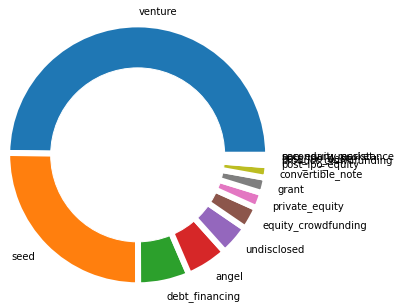

venture                  52024
seed                     26438
debt_financing            6701
angel                     5417
undisclosed               3960
equity_crowdfunding       2970
private_equity            2055
grant                     2001
convertible_note          1633
post_ipo_equity            608
product_crowdfunding       351
post_ipo_debt              151
non_equity_assistance      136
secondary_market            87
Name: funding_round_type, dtype: int64


In [37]:
#### Pie chart for all funding types
all_round_types = master_frame.funding_round_type.value_counts()

# Create a pieplot
plt.pie(all_round_types.values, labels=all_round_types.index, radius=1.5, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white' })

# add a circle at the center
hallow_circle=plt.Circle( (0,0), 1, color='white')
pie_plot_all_funding_types=plt.gcf()
pie_plot_all_funding_types.gca().add_artist(hallow_circle)

plt.show()
print(all_round_types)

In [38]:
required_funding_round_types = ['venture', 'seed', 'angel', 'private_equity']
master_frame = master_frame[master_frame.funding_round_type.isin(required_funding_round_types)]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85934 entries, 0 to 114947
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   85934 non-null  object 
 1   funding_round_type  85934 non-null  object 
 2   raised_amount_usd   75124 non-null  float64
 3   name                85933 non-null  object 
 4   category_list       85934 non-null  object 
 5   country_code        85934 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.6+ MB


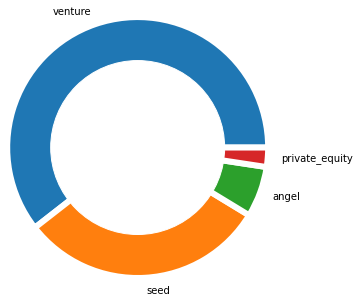

venture           52024
seed              26438
angel              5417
private_equity     2055
Name: funding_round_type, dtype: int64


In [39]:
#### Pie chart for required funding types
req_round_types = master_frame.funding_round_type.value_counts()

# Create a pieplot
plt.pie(req_round_types.values, labels=req_round_types.index, radius=1.5, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white' })

# add a circle at the center
hallow_circle=plt.Circle( (0,0), 1, color='white')
pie_plot_req_funding_types=plt.gcf()
pie_plot_req_funding_types.gca().add_artist(hallow_circle)

plt.show()
print(req_round_types)

In [40]:
round((master_frame.isnull().sum()/masterFrame_total_observations)*100,2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     9.4
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [41]:
master_frame[master_frame['funding_round_type'] == 'angel']['raised_amount_usd']

51              NaN
69         100000.0
93         500000.0
98              NaN
106        619494.0
            ...    
114913          NaN
114919    2325000.0
114929    2007363.0
114935     875000.0
114939     400000.0
Name: raised_amount_usd, Length: 5417, dtype: float64

In [42]:
master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd']

0         10000000.0
1                NaN
4          2000000.0
5                NaN
8           719491.0
             ...    
114931     7991547.0
114934      140500.0
114936     8500000.0
114937     2686600.0
114941     1587301.0
Name: raised_amount_usd, Length: 52024, dtype: float64

In [43]:
master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd']

2          700000.0
7           43360.0
9         3000000.0
13         150000.0
15        1000050.0
            ...    
114940     320000.0
114942       7000.0
114943      33149.0
114945      32842.0
114947      18192.0
Name: raised_amount_usd, Length: 26438, dtype: float64

In [44]:
master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd']

21          6000000.0
153       200000000.0
178               NaN
231       325000000.0
312          200708.0
             ...     
114406      4319243.0
114460            NaN
114878            NaN
114882      5000000.0
114928        20967.0
Name: raised_amount_usd, Length: 2055, dtype: float64

In [45]:
master_frame['raised_amount_usd']

0         10000000.0
1                NaN
2           700000.0
4          2000000.0
5                NaN
             ...    
114941     1587301.0
114942        7000.0
114943       33149.0
114945       32842.0
114947       18192.0
Name: raised_amount_usd, Length: 85934, dtype: float64

#### After seggregating the data for required ventures amount of NULL data percentage for column `raised_amount_usd` got reduced to 9.4.

#### Lets impute those null values with median of those respective `funding_round_type` median values

In [46]:
master_frame['raised_amount_usd'] = master_frame.groupby(['funding_round_type']).raised_amount_usd.apply(lambda x : x.fillna(x.median()))

##### Cross checking wether data is imputed correctly or not

In [47]:
master_frame[master_frame['funding_round_type'] == 'angel']['raised_amount_usd']

51         414906.0
69         100000.0
93         500000.0
98         414906.0
106        619494.0
            ...    
114913     414906.0
114919    2325000.0
114929    2007363.0
114935     875000.0
114939     400000.0
Name: raised_amount_usd, Length: 5417, dtype: float64

In [48]:
master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd']

0         10000000.0
1          5000000.0
4          2000000.0
5          5000000.0
8           719491.0
             ...    
114931     7991547.0
114934      140500.0
114936     8500000.0
114937     2686600.0
114941     1587301.0
Name: raised_amount_usd, Length: 52024, dtype: float64

In [49]:
master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd']

2          700000.0
7           43360.0
9         3000000.0
13         150000.0
15        1000050.0
            ...    
114940     320000.0
114942       7000.0
114943      33149.0
114945      32842.0
114947      18192.0
Name: raised_amount_usd, Length: 26438, dtype: float64

In [50]:
master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd']

21          6000000.0
153       200000000.0
178        20000000.0
231       325000000.0
312          200708.0
             ...     
114406      4319243.0
114460     20000000.0
114878     20000000.0
114882      5000000.0
114928        20967.0
Name: raised_amount_usd, Length: 2055, dtype: float64

In [51]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [52]:
round((master_frame.isnull().sum()/masterFrame_total_observations)*100,2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

#### Now all the null values from data set were removed

# Results Expected: Table 2.1

### Representative funding amount for different types of fundings

In [53]:
representative_funding_amounts = pd.pivot_table(master_frame, index='funding_round_type', values='raised_amount_usd', aggfunc=np.median)
representative_funding_amounts

,raised_amount_usd
funding_round_type,
angel,414906.0
private_equity,20000000.0
seed,300000.0
venture,5000000.0


#### Therefore representative funding amounts for different types of funding_types are as follows
### `angel` : `414906.0`
### `private_equity` : `20000000.0`
### `seed` : `300000.0`
### `venture` : `5000000.0`

### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [54]:
#### converting billion dollars into readable format by formatting big number into smaller number by dividing with 10e5
#### So that 20000000.0 will become 20.00  which means 20 million USD
representative_funding_amounts = round(representative_funding_amounts/10e5, 2)
representative_funding_amounts

,raised_amount_usd
funding_round_type,
angel,0.41
private_equity,20.00
seed,0.30
venture,5.00


<Figure size 1080x1080 with 0 Axes>

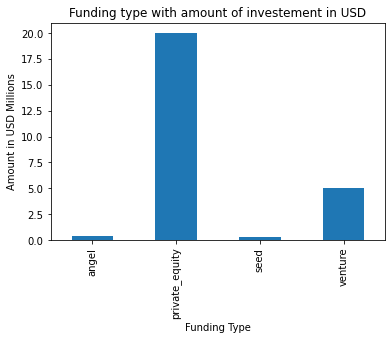

In [55]:
plt.figure(figsize=(15,15))
funding_type_amount_plot = representative_funding_amounts.plot.bar(legend=False)
plt.title("Funding type with amount of investement in USD")
funding_type_amount_plot.set(ylabel='Amount in USD Millions', xlabel='Funding Type')
plt.show()

# Therefore for Spark Funds `venture` type is more suitable to invest in between 5-15 Million USD s.

In [56]:
### Since it was clear that spark funds will make investment on 'venture'. So, now retain all rows whose type is not 'venture'
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [57]:
### drop the column 'funding_round_type' since it will be same for all rows
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

In [58]:
master_frame

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.0,#fame,Media,IND
1,/organization/-qounter,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,2000000.0,0-6.com,Curated Web,CHN
5,/organization/004-technologies,5000000.0,004 Technologies,Software,USA
8,/organization/0ndine-biomedical-inc,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
...,...,...,...,...,...
114931,/organization/zyraz-technology,7991547.0,Zyraz Technology,Biotechnology,MYS
114934,/organization/zyrra,140500.0,Zyrra,E-Commerce,USA
114936,/organization/zystor,8500000.0,Zystor,Biotechnology,USA
114937,/organization/zytoprotec,2686600.0,Zytoprotec,Biotechnology,AUT


# Results Expected: Table 3.1

In [59]:
### make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)
top9 = pd.pivot_table(master_frame, values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9

,raised_amount_usd
country_code,
ARE,3.826175e+08
ARG,3.643388e+08
ARM,2.651750e+07
AUS,1.404029e+09
AUT,6.383607e+08
...,...
UKR,1.779246e+07
URY,1.983000e+07
USA,4.305230e+11


In [60]:
# Sort data based on amount
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9

,raised_amount_usd
country_code,
USA,4.305230e+11
CHN,4.185392e+10
GBR,2.119281e+10
IND,1.508651e+10
CAN,9.907218e+09
...,...
ECU,9.658500e+05
MCO,6.570000e+05
SAU,5.000000e+05


In [61]:
# Get top9 data from sorted data
top9 = top9.iloc[:9, ]
top9

,raised_amount_usd
country_code,
USA,4.305230e+11
CHN,4.185392e+10
GBR,2.119281e+10
IND,1.508651e+10
CAN,9.907218e+09
FRA,7.521851e+09
ISR,7.409350e+09
DEU,7.401922e+09
JPN,3.362647e+09


In [62]:
top9_countries = set(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'])
top9_countries

{'CAN', 'CHN', 'DEU', 'FRA', 'GBR', 'IND', 'ISR', 'JPN', 'USA'}

In [63]:
english_speaking_countries = set(['ATG', 'BHS', 'BRB', 'BLZ', 'BWA', 'BDI', 'CMR', 'CAN', 'DMA', 'SWZ', 'FJI', 'GMB', 'GHA', 'GRD', 'GUY', 'IND', 'IRL', 'JAM', 'KEN', 'KIR', 'LSO', 'LBR', 'MWI', 'MLT', 'MHL', 'FSM', 'NAM', 'NRU', 'NGA', 'PAK', 'PLW', 'PNG', 'PHL', 'KNA', 'LCA', 'VCT', 'WSM', 'SYC', 'SLE', 'SGP', 'SLB', 'ZAF', 'SSD', 'SDN', 'TZA', 'TON', 'TUV', 'VUT', 'ZMB', 'ZWE', 'AUS', 'NZL', 'GBR', 'USA'])

In [64]:
### Finding english speaking countries from top9 highest funded countries
top9_eng_speaking_countries = top9_countries.intersection(english_speaking_countries)
top9_eng_speaking_countries

{'CAN', 'GBR', 'IND', 'USA'}

In [65]:
top9

,raised_amount_usd
country_code,
USA,4.305230e+11
CHN,4.185392e+10
GBR,2.119281e+10
IND,1.508651e+10
CAN,9.907218e+09
FRA,7.521851e+09
ISR,7.409350e+09
DEU,7.401922e+09
JPN,3.362647e+09


### From table and the list of english speaking countries we can find the top 3 english speaking countries who raised highest funds are `USA, GBR, IND`  respectively

### Plot graph for top9 countries

In [66]:
top_countries = master_frame.groupby(['country_code']).raised_amount_usd.apply(lambda x : x.sum())
top_countries

country_code
ARE    3.826175e+08
ARG    3.643388e+08
ARM    2.651750e+07
AUS    1.404029e+09
AUT    6.383607e+08
           ...     
UKR    1.779246e+07
URY    1.983000e+07
USA    4.305230e+11
VNM    1.073205e+08
ZAF    2.937131e+08
Name: raised_amount_usd, Length: 103, dtype: float64

In [67]:
top_countries = top_countries.reset_index().sort_values(by='raised_amount_usd', ascending=False)
top_countries

,country_code,raised_amount_usd
100,USA,4.305230e+11
16,CHN,4.185392e+10
31,GBR,2.119281e+10
41,IND,1.508651e+10
13,CAN,9.907218e+09
...,...,...
25,ECU,9.658500e+05
61,MCO,6.570000e+05
85,SAU,5.000000e+05
36,GTM,3.000000e+05


In [68]:
top9_countries = top_countries.iloc[:9, ]
top9_countries

,country_code,raised_amount_usd
100,USA,4.305230e+11
16,CHN,4.185392e+10
31,GBR,2.119281e+10
41,IND,1.508651e+10
13,CAN,9.907218e+09
30,FRA,7.521851e+09
44,ISR,7.409350e+09
23,DEU,7.401922e+09
47,JPN,3.362647e+09


In [69]:
def isEnglishSpeakingCountry(country_code):
    if country_code in english_speaking_countries:
        return 'Y';
    else:
        return 'N';

In [70]:
top9_countries['isEnglishSpeaking'] = top9_countries['country_code'].apply(isEnglishSpeakingCountry);
top9_countries

<ipython-input-70-32fd66d36644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9_countries['isEnglishSpeaking'] = top9_countries['country_code'].apply(isEnglishSpeakingCountry);


,country_code,raised_amount_usd,isEnglishSpeaking
100,USA,4.305230e+11,Y
16,CHN,4.185392e+10,N
31,GBR,2.119281e+10,Y
41,IND,1.508651e+10,Y
13,CAN,9.907218e+09,Y
30,FRA,7.521851e+09,N
44,ISR,7.409350e+09,N
23,DEU,7.401922e+09,N
47,JPN,3.362647e+09,N


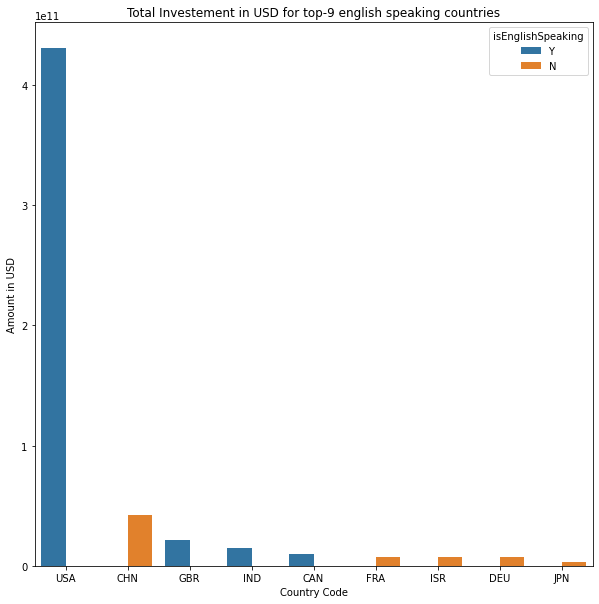

In [71]:
plt.figure(figsize=(10,10))
bar_plot = sb.barplot(data=top9_countries, x='country_code', y='raised_amount_usd', hue='isEnglishSpeaking')
bar_plot.set(xlabel="Country Code", ylabel = "Amount in USD")
plt.title("Total Investement in USD for top-9 english speaking countries")
plt.show()

### Now retaining the other rows whose country is different from the top 3 english speaking countries. Since spark funds wants to invest only on top 3 english speaking countries

In [72]:
top3_english_speaking_countries = ['USA', 'GBR', 'IND']

In [73]:
master_frame.shape

(52024, 5)

In [74]:
master_frame = master_frame[master_frame.country_code.isin(top3_english_speaking_countries)]
master_frame['country_code'].value_counts()

USA    38034
GBR     2265
IND      984
Name: country_code, dtype: int64

In [75]:
master_frame.shape

(41283, 5)

# Results Expected: Table 5.1

In [76]:
### find null data in mapping data set
mapping = pd.read_csv('mapping.csv', encoding='ISO-8859-1')
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [77]:
mapping.shape

(688, 10)

In [78]:
# Since only one row having category_list as null and it is the primary key for mapping data set 
# we can't assume and impute it so, better to drop that row

mapping = mapping[~(mapping.category_list.isnull() == True)]
mapping.shape

(687, 10)

In [79]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


#### Now let us clean data for `category_list` in master_frame dataset

In [80]:
master_frame['category_list'].value_counts()

Biotechnology                                                           4728
Software                                                                3391
Health Care                                                             1258
Clean Technology                                                        1090
Enterprise Software                                                     1053
                                                                        ... 
Advertising|Publishing|Social Media Marketing|User Experience Design       1
Nonprofits|SaaS|Social Fundraising                                         1
Career Planning|Personal Data|Video                                        1
Computers|Finance Technology|Financial Services|Software                   1
Chat|Identity|Messaging                                                    1
Name: category_list, Length: 8377, dtype: int64

In [81]:
### As per the business rule let us consider the first category among the list of categories sperated by '|' 
### and place it in a seperate column with name 'primary_sector'

master_frame['primary_sector'] = master_frame['category_list'].apply(lambda category: category.split('|')[0])
master_frame['primary_sector'].value_counts()

<ipython-input-81-0d2fc1011d48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['primary_sector'] = master_frame['category_list'].apply(lambda category: category.split('|')[0])


Biotechnology          6012
Software               3505
Advertising            1943
Health Care            1639
Enterprise Software    1631
                       ... 
Outdoors                  1
Tea                       1
GreenTech                 1
Online Identity           1
Financial Exchanges       1
Name: primary_sector, Length: 577, dtype: int64

In [82]:
### Create a column named main_sector in mapping table based on the data given for each category_list
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping

,category_list,variable,value
0,3D,Manufacturing,1
1,3D Printing,Manufacturing,1
2,3D Technology,Manufacturing,1
3,Accounting,Manufacturing,0
4,Active Lifestyle,Manufacturing,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [83]:
### Here value 1 means having there is a mapping between that category_list and the sector. 0 means no mapping 
### So, drop values whose value is 0
mapping = mapping[~(mapping.value == 0)]
mapping

,category_list,variable,value
0,3D,Manufacturing,1
1,3D Printing,Manufacturing,1
2,3D Technology,Manufacturing,1
6,Advanced Materials,Manufacturing,1
14,Agriculture,Manufacturing,1
...,...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5426,Social Television,"Social, Finance, Analytics, Advertising",1
5427,Social Travel,"Social, Finance, Analytics, Advertising",1
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [84]:
### Now, there is no use of column value so, lets drop it
mapping = mapping.drop('value', axis = 1)
mapping

,category_list,variable
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [85]:
### rename column variable with 'main_sector'
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping

,category_list,main_sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [86]:
mapping['category_list'] = mapping['category_list'].str.lower()
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

<ipython-input-86-e7d6c2fee56e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()


In [87]:
### Replacing 0 and 2.na since 'na' is mis-splet as 0
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)

In [88]:
### Now lets combine the master_frame and the mapping datasets for the further analysis

master_frame = master_frame.merge(mapping, how='inner', left_on='primary_sector', right_on='category_list')
master_frame.shape

(41268, 8)

In [89]:
master_frame.isnull().sum()

company_permalink    0
raised_amount_usd    0
name                 0
category_list_x      0
country_code         0
primary_sector       0
category_list_y      0
main_sector          0
dtype: int64

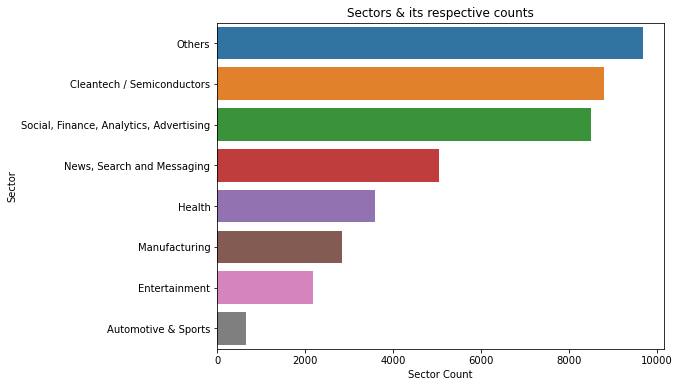

Others                                     9675
Cleantech / Semiconductors                 8797
Social, Finance, Analytics, Advertising    8496
News, Search and Messaging                 5037
Health                                     3595
Manufacturing                              2839
Entertainment                              2177
Automotive & Sports                         652
Name: main_sector, dtype: int64


In [90]:
sectors = master_frame.main_sector.value_counts()

plt.figure(figsize=(8, 6))
b = sb.barplot(x=sectors.values, y=sectors.index)
b.set(xlabel="Sector Count", ylabel = "Sector")
plt.title("Sectors & its respective counts")
plt.show()

print(sectors)

In [91]:
lower_bound_usd = 5000000;
upper_bound_usd = 15000000;

In [92]:
#### since spark funds wants to invest around 5 to 15 million dollars lests seggregate data for that particular amount only

master_frame = master_frame[ (master_frame.raised_amount_usd >= lower_bound_usd) & (master_frame.raised_amount_usd <= upper_bound_usd) ]
master_frame

,company_permalink,raised_amount_usd,name,category_list_x,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,10000000.0,#fame,Media,IND,media,media,Entertainment
1,/organization/90min,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,media,Entertainment
2,/organization/90min,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,media,Entertainment
4,/organization/all-def-digital,5000000.0,All Def Digital,Media,USA,media,media,Entertainment
14,/organization/chefs-feed,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,USA,media,media,Entertainment
...,...,...,...,...,...,...,...,...
41254,/organization/vector-watch,5000000.0,Vector Watch,Watch|Wearables,GBR,watch,watch,Others
41255,/organization/vision-internet,5000000.0,Vision Internet,Government Innovation|Internet,USA,government innovation,government innovation,Others
41256,/organization/washio,10500000.0,Washio,Service Industries,USA,service industries,service industries,Others
41257,/organization/windshield,5000000.0,Windshield,Virtual Workforces,USA,virtual workforces,virtual workforces,Entertainment


In [93]:
### Per country count of sectors they are investing on
master_frame.groupby(['country_code'])['main_sector'].count()

country_code
GBR      845
IND      493
USA    14154
Name: main_sector, dtype: int64

In [94]:
### Per country sum of amount invested on all sectors 
master_frame.groupby(['country_code'])['raised_amount_usd'].sum()

country_code
GBR    6.499079e+09
IND    3.774544e+09
USA    1.182121e+11
Name: raised_amount_usd, dtype: float64

In [95]:
### Table to show each country and each sector investements count and the total sum invested on that sector
master_frame.groupby(['country_code','main_sector']).raised_amount_usd.agg(['count','sum'])

count           sum
country_code main_sector                                                 
GBR          Automotive & Sports                         26  2.170516e+08
             Cleantech / Semiconductors                 154  1.283990e+09
             Entertainment                               80  6.027847e+08
             Health                                      32  2.545375e+08
             Manufacturing                               52  4.119403e+08
             News, Search and Messaging                  97  7.357462e+08
             Others                                     211  1.603624e+09
             Social, Finance, Analytics, Advertising    193  1.389404e+09
IND          Automotive & Sports                         14  1.419000e+08
             Cleantech / Semiconductors                  29  2.103800e+08
             Entertainment                               47  3.508300e+08
             Health                                      33  2.377400e+08
             Manufacturing                               30  2.459000e+08
             News, Search and Messaging                  76  5.538345e+08
             Others                                     158  1.253410e+09
             Social, Finance, Analytics, Advertising    106  7.805496e+08
USA          Automotive & Sports                        228  1.759104e+09
             Cleantech / Semiconductors                2622  2.299343e+10
             Entertainment                              724  5.764198e+09
             Health                                    1053  8.931859e+09
             Manufacturing                              989  8.208553e+09
             News, Search and Messaging                1845  1.528157e+10
             Others                                    3403  2.858601e+10
             Social, Finance, Analytics, Advertising   3290  2.668738e+10

### Create three data frames D1, D2, D3 for further analysis

In [96]:
### From the master_frame data frame lets create a dataframe D1 for the sectors and its respective investments for 'USA'
D1 = master_frame[(master_frame['country_code'] == 'USA')]
D1_grouped_data = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_grouped_data, how='left', on ='main_sector')
D1

/Users/srikanthpadmanabhuni/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,raised_amount_usd,name,category_list_x,country_code,primary_sector,category_list_y,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/all-def-digital,5000000.0,All Def Digital,Media,USA,media,media,Entertainment,5.764198e+09,724
1,/organization/chefs-feed,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,USA,media,media,Entertainment,5.764198e+09,724
2,/organization/huffingtonpost,5000000.0,The Huffington Post,Media|News|Publishing,USA,media,media,Entertainment,5.764198e+09,724
3,/organization/huffingtonpost,5000000.0,The Huffington Post,Media|News|Publishing,USA,media,media,Entertainment,5.764198e+09,724
4,/organization/matchmine,10000000.0,MatchMine,Media|News|Reviews and Recommendations,USA,media,media,Entertainment,5.764198e+09,724
...,...,...,...,...,...,...,...,...,...,...
14149,/organization/user-interface,8250000.0,User Interface,User Interface,USA,user interface,user interface,Others,2.858601e+10,3403
14150,/organization/vision-internet,5000000.0,Vision Internet,Government Innovation|Internet,USA,government innovation,government innovation,Others,2.858601e+10,3403
14151,/organization/washio,10500000.0,Washio,Service Industries,USA,service industries,service industries,Others,2.858601e+10,3403
14152,/organization/windshield,5000000.0,Windshield,Virtual Workforces,USA,virtual workforces,virtual workforces,Entertainment,5.764198e+09,724


In [97]:
### From the master_frame data frame lets create a dataframe D1 for the sectors and its respective investments for 'GBR'
D2 = master_frame[(master_frame['country_code'] == 'GBR')]
D2_grouped_data = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_grouped_data, how='left', on ='main_sector')
D2

/Users/srikanthpadmanabhuni/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,raised_amount_usd,name,category_list_x,country_code,primary_sector,category_list_y,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/90min,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,media,Entertainment,6.027847e+08,80
1,/organization/90min,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,media,media,Entertainment,6.027847e+08,80
2,/organization/common-interest-communities,10000000.0,Common Interest Communities,Application Platforms|Internet|Software|Startups,GBR,application platforms,application platforms,"News, Search and Messaging",7.357462e+08,97
3,/organization/geospock-ltd-,5460000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,GBR,application platforms,application platforms,"News, Search and Messaging",7.357462e+08,97
4,/organization/geospock-ltd-,5400000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,GBR,application platforms,application platforms,"News, Search and Messaging",7.357462e+08,97
...,...,...,...,...,...,...,...,...,...,...
840,/organization/uk-coal,5000000.0,UK Coal,Mining Technologies,GBR,mining technologies,mining technologies,Cleantech / Semiconductors,1.283990e+09,154
841,/organization/yoyo,10000000.0,Yoyo Wallet,Loyalty Programs|Mobile|Mobile Payments|Retail,GBR,loyalty programs,loyalty programs,Others,1.603624e+09,211
842,/organization/sharethe,5000000.0,ShareThe,Soccer|Social Media|Social Network Media|Sports,GBR,soccer,soccer,Automotive & Sports,2.170516e+08,26
843,/organization/stingray-geophysical,11460000.0,Stingray Geophysical,Gas|Oil|Services,GBR,gas,gas,Cleantech / Semiconductors,1.283990e+09,154


In [98]:
### From the master_frame data frame lets create a dataframe D1 for the sectors and its respective investments for 'IND'
D3 = master_frame[(master_frame['country_code'] == 'IND')]
D3_grouped_data = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_grouped_data, how='left', on ='main_sector')
D3

/Users/srikanthpadmanabhuni/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,raised_amount_usd,name,category_list_x,country_code,primary_sector,category_list_y,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,10000000.0,#fame,Media,IND,media,media,Entertainment,3.508300e+08,47
1,/organization/ameyo,5000000.0,Ameyo,Software,IND,software,software,Others,1.253410e+09,158
2,/organization/applabs,10000000.0,AppLabs,Software,IND,software,software,Others,1.253410e+09,158
3,/organization/appsdaily-solutions,5000000.0,Appsdaily Solutions,Software,IND,software,software,Others,1.253410e+09,158
4,/organization/canvera-digital-technologies,6500000.0,Canvera Digital Technologies,Software,IND,software,software,Others,1.253410e+09,158
...,...,...,...,...,...,...,...,...,...,...
488,/organization/vinculum-solutions,5000000.0,Vinculum Solutions,Retail Technology|Software,IND,retail technology,retail technology,"Social, Finance, Analytics, Advertising",7.805496e+08,106
489,/organization/matrimony-com,11750000.0,Matrimony.com,Classifieds|Curated Web,IND,classifieds,classifieds,"News, Search and Messaging",5.538345e+08,76
490,/organization/matrimony-com,8650000.0,Matrimony.com,Classifieds|Curated Web,IND,classifieds,classifieds,"News, Search and Messaging",5.538345e+08,76
491,/organization/mosambee,5000000.0,Mosambee,Fruit,IND,fruit,fruit,Others,1.253410e+09,158


### Sector-wise Investment Analysis

In [99]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

14154
845
493


In [100]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

118212097294.0
6499078691.0
3774543602.0


In [101]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_grouped_data

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          1.759104e+09         228
Cleantech / Semiconductors                   2.299343e+10        2622
Entertainment                                5.764198e+09         724
Health                                       8.931859e+09        1053
Manufacturing                                8.208553e+09         989
News, Search and Messaging                   1.528157e+10        1845
Others                                       2.858601e+10        3403
Social, Finance, Analytics, Advertising      2.668738e+10        3290

<Figure size 720x720 with 0 Axes>

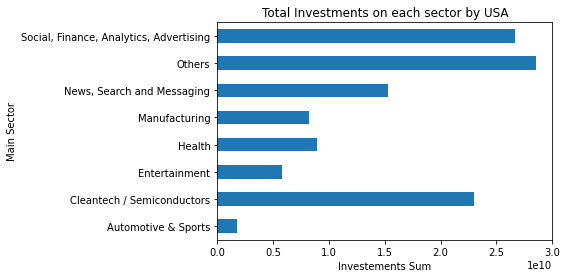

In [102]:
### Finding top 3 sectors for D1 based on sum of investements on each sector
plt.figure(figsize=(10, 10))
d1_sectors_investement_sum_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum'])
d1_sectors_investement_sum = d1_sectors_investement_sum_gr.plot.barh(legend=False)
d1_sectors_investement_sum.set(xlabel="Investements Sum", ylabel = "Main Sector")
plt.title("Total Investments on each sector by USA")
plt.show()

### From the above it is clear that for USA based on sum of investemets Top 3 sectors are `Others, Social, Finance, Analytics, Advertising, Cleantech / Semiconductors	`

<Figure size 720x720 with 0 Axes>

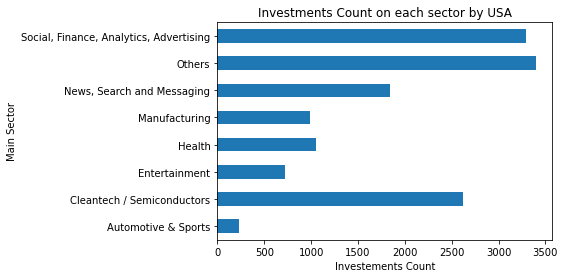

In [103]:
### Finding top 3 sectors for D1 based on count of investements on each sector
plt.figure(figsize=(10, 10))
d1_sectors_investement_count_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['count'])
d1_sectors_investement_count = d1_sectors_investement_count_gr.plot.barh(legend=False)
d1_sectors_investement_count.set(xlabel="Investements Count", ylabel = "Main Sector")
plt.title("Investments Count on each sector by USA")
plt.show()

### From the above it is clear that for USA based on Count of investemets Top 3 sectors are `Others, Social, Finance, Analytics, Advertising, Cleantech / Semiconductors`

In [104]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2_grouped_data

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          2.170516e+08          26
Cleantech / Semiconductors                   1.283990e+09         154
Entertainment                                6.027847e+08          80
Health                                       2.545375e+08          32
Manufacturing                                4.119403e+08          52
News, Search and Messaging                   7.357462e+08          97
Others                                       1.603624e+09         211
Social, Finance, Analytics, Advertising      1.389404e+09         193

<Figure size 720x720 with 0 Axes>

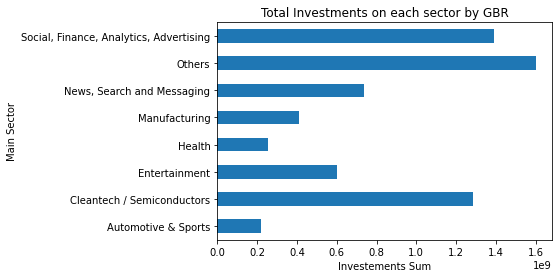

In [105]:
### Finding top 3 sectors for D2 based on sum of investements on each sector
plt.figure(figsize=(10, 10))
d2_sectors_investement_sum_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum'])
d2_sectors_investement_sum = d2_sectors_investement_sum_gr.plot.barh(legend=False)
d2_sectors_investement_sum.set(xlabel="Investements Sum", ylabel = "Main Sector")
plt.title("Total Investments on each sector by GBR")
plt.show()

### From the above it is clear that for GBR based on sum of investemets Top 3 sectors are `Others, Social, Finance, Analytics, Advertising, Cleantech / Semiconductors`

<Figure size 720x720 with 0 Axes>

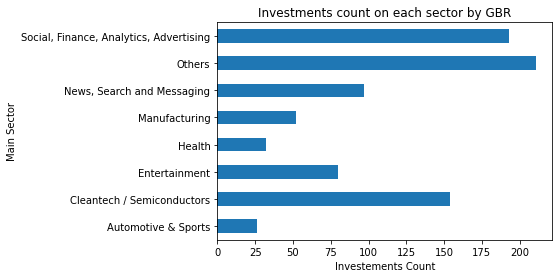

In [106]:
### Finding top 3 sectors for D2 based on count of investements on each sector
plt.figure(figsize=(10, 10))
d2_sectors_investement_count_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['count'])
d2_sectors_investement_count = d2_sectors_investement_count_gr.plot.barh(legend=False)
d2_sectors_investement_count.set(xlabel="Investements Count", ylabel = "Main Sector")
plt.title("Investments count on each sector by GBR")
plt.show()

### From the above it is clear that for GBR based on count of investemets Top 3 sectors are `Others, Social, Finance, Analytics, Advertising, Cleantech / Semiconductors`

In [107]:
#Top sector, second-top, third-top for D3 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3_grouped_data

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          1.419000e+08          14
Cleantech / Semiconductors                   2.103800e+08          29
Entertainment                                3.508300e+08          47
Health                                       2.377400e+08          33
Manufacturing                                2.459000e+08          30
News, Search and Messaging                   5.538345e+08          76
Others                                       1.253410e+09         158
Social, Finance, Analytics, Advertising      7.805496e+08         106

<Figure size 720x720 with 0 Axes>

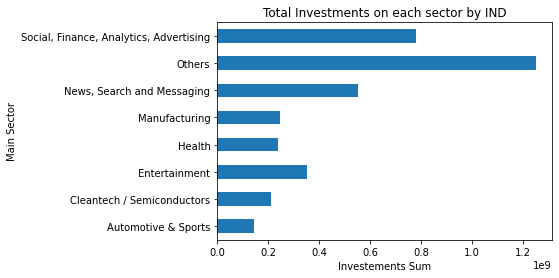

In [108]:
### Finding top 3 sectors for D3 based on sum of investements on each sector
plt.figure(figsize=(10, 10))
d3_sectors_investement_sum_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum'])
d3_sectors_investement_sum = d3_sectors_investement_sum_gr.plot.barh(legend=False)
d3_sectors_investement_sum.set(xlabel="Investements Sum", ylabel = "Main Sector")
plt.title("Total Investments on each sector by IND")
plt.show()

### From the above it is clear that for IND based on sum of investemets Top 3 sectors are `Others, Social, Finance, Analytics, Advertising, News, Search and Messaging`

<Figure size 720x720 with 0 Axes>

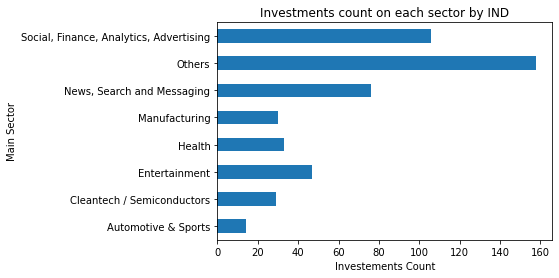

In [109]:
### Finding top 3 sectors for D3 based on count of investements on each sector
plt.figure(figsize=(10, 10))
d3_sectors_investement_count_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['count'])
d3_sectors_investement_count = d3_sectors_investement_count_gr.plot.barh(legend=False)
d3_sectors_investement_count.set(xlabel="Investements Count", ylabel = "Main Sector")
plt.title("Investments count on each sector by IND")
plt.show()

### From the above it is clear that for IND based on count of investemets Top 3 sectors are `Others, Social, Finance, Analytics, Advertising, News, Search and Messaging`

### Therefore based on No.Of investements Top3 Sectors for each country are as follows
###

    ###    -----------------------------------------------------------------------------------------------------
    ###    | Country_Code |    Top1    |               Top2                   |          Top3          |
    ###    -----------------------------------------------------------------------------------------------------
    ###    |    USA       |   OTHERS   | Social, Finance, Analytics, Advertising  | Cleantech / Semiconductors |
    ###    |    GBR       |   OTHERS   | Social, Finance, Analytics, Advertising  | Cleantech / Semiconductors |
    ###    |    IND       |   OTHERS   | Social, Finance, Analytics, Advertising  | News, Search and Messaging |
    ###    -----------------------------------------------------------------------------------------------------
    
 
### Therefore based on Total Sum.Of investements Top3 Sectors for each country are as follows
###

    ###    -----------------------------------------------------------------------------------------------------
    ###    | Country_Code |    Top1    |               Top2                   |          Top3          |
    ###    -----------------------------------------------------------------------------------------------------
    ###    |    USA       |   OTHERS   | Social, Finance, Analytics, Advertising  | Cleantech / Semiconductors |
    ###    |    GBR       |   OTHERS   | Social, Finance, Analytics, Advertising  | Cleantech / Semiconductors |
    ###    |    IND       |   OTHERS   | Social, Finance, Analytics, Advertising  | News, Search and Messaging |
    ###    -----------------------------------------------------------------------------------------------------

In [110]:
#For the top sector USA , which company received the highest investment?
company_usa_others = D1[D1['main_sector']=='Others']
company_usa_others = company_usa_others.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_usa_others = company_usa_others.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_usa_others.head(1))

#For the second top sector USA , which company received the highest investment?
company_usa_sfaa = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company_usa_sfaa = company_usa_sfaa.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_usa_sfaa = company_usa_sfaa.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_usa_sfaa.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream         64300000.0
                           raised_amount_usd
company_permalink                           
/organization/shotspotter         67933006.0


<Figure size 720x720 with 0 Axes>

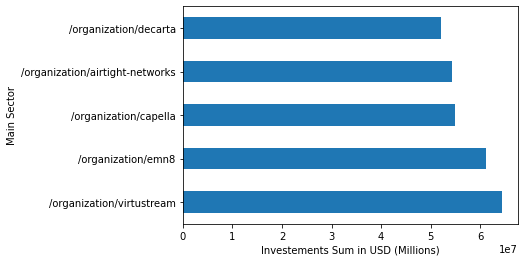

In [111]:
### Finding top company invested on top sector from USA
plt.figure(figsize=(10, 10))
company_usa_others_plot = company_usa_others.plot.barh(legend=False)
company_usa_others_plot.set(xlabel="Investements Sum in USD (Millions)", ylabel = "Main Sector")
plt.show()

<Figure size 720x720 with 0 Axes>

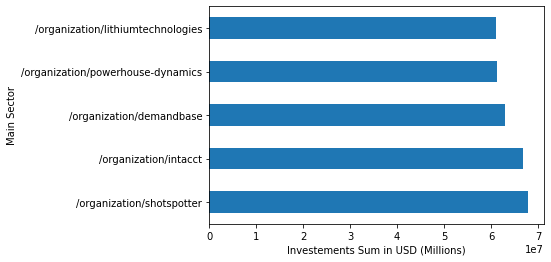

In [112]:
### Finding top company invested on 2nd top sector from USA
plt.figure(figsize=(10, 10))
company_usa_sfaa_plot = company_usa_sfaa.plot.barh(legend=False)
company_usa_sfaa_plot.set(xlabel="Investements Sum in USD (Millions)", ylabel = "Main Sector")
plt.show()

In [113]:
#For the top sector GBR , which company received the highest investment?
company_gbr_others = D2[D2['main_sector']=='Others']
company_gbr_others = company_gbr_others.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_gbr_others = company_gbr_others.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_gbr_others.head(2))

#For the second top sector GBR , which company received the highest investment?
company_gbr_sfaa = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company_gbr_sfaa = company_gbr_sfaa.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_gbr_sfaa = company_gbr_sfaa.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_gbr_sfaa.head(2))

                                  raised_amount_usd
company_permalink                                  
/organization/electric-cloud             37000000.0
/organization/notonthehighstreet         36900000.0
                                     raised_amount_usd
company_permalink                                     
/organization/zopa                          37900000.0
/organization/celltick-technologies         37500000.0


<Figure size 720x720 with 0 Axes>

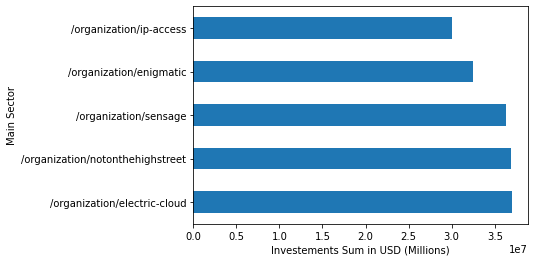

In [114]:
### Finding top company invested on top sector from GBR
plt.figure(figsize=(10, 10))
company_gbr_others_plot = company_gbr_others.plot.barh(legend=False)
company_gbr_others_plot.set(xlabel="Investements Sum in USD (Millions)", ylabel = "Main Sector")
plt.show()

<Figure size 720x720 with 0 Axes>

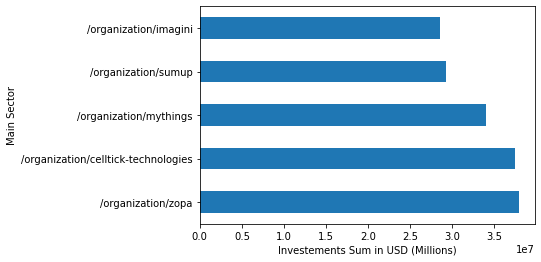

In [115]:
### Finding top company invested on 2nd top sector from GBR
plt.figure(figsize=(10, 10))
company_gbr_sfaa_plot = company_gbr_sfaa.plot.barh(legend=False)
company_gbr_sfaa_plot.set(xlabel="Investements Sum in USD (Millions)", ylabel = "Main Sector")
plt.show()

In [116]:
#For the top sector IND , which company received the highest investment?
company_ind_others = D3[D3['main_sector']=='Others']
company_ind_others = company_ind_others.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_ind_others = company_ind_others.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_ind_others.head(2))

#For the second top sector IND , which company received the highest investment?
company_ind_sfaa = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company_ind_sfaa = company_ind_sfaa.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_ind_sfaa = company_ind_sfaa.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_ind_sfaa.head(2))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com         39000000.0
/organization/myntra               38000000.0
                               raised_amount_usd
company_permalink                               
/organization/manthan-systems         50700000.0
/organization/komli-media             28000000.0


<Figure size 720x720 with 0 Axes>

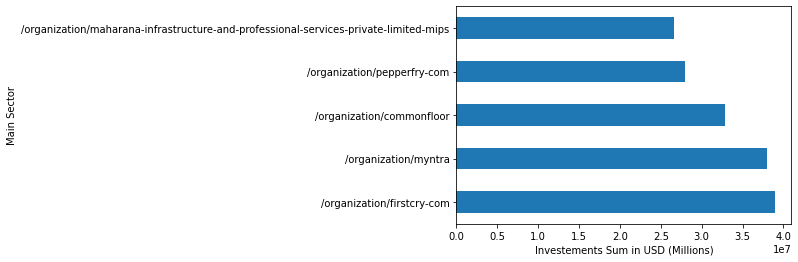

In [117]:
### Finding top company invested on top sector from IND
plt.figure(figsize=(10, 10))
company_ind_others_plot = company_ind_others.plot.barh(legend=False)
company_ind_others_plot.set(xlabel="Investements Sum in USD (Millions)", ylabel = "Main Sector")
plt.show()

<Figure size 720x720 with 0 Axes>

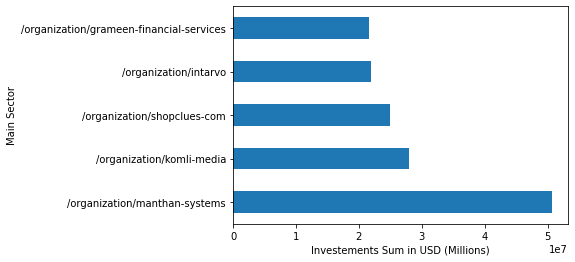

In [118]:
### Finding top company invested on 2nd top sector from IND
plt.figure(figsize=(10, 10))
company_ind_sfaa_plot = company_ind_sfaa.plot.barh(legend=False)
company_ind_sfaa_plot.set(xlabel="Investements Sum in USD (Millions)", ylabel = "Main Sector")
plt.show()

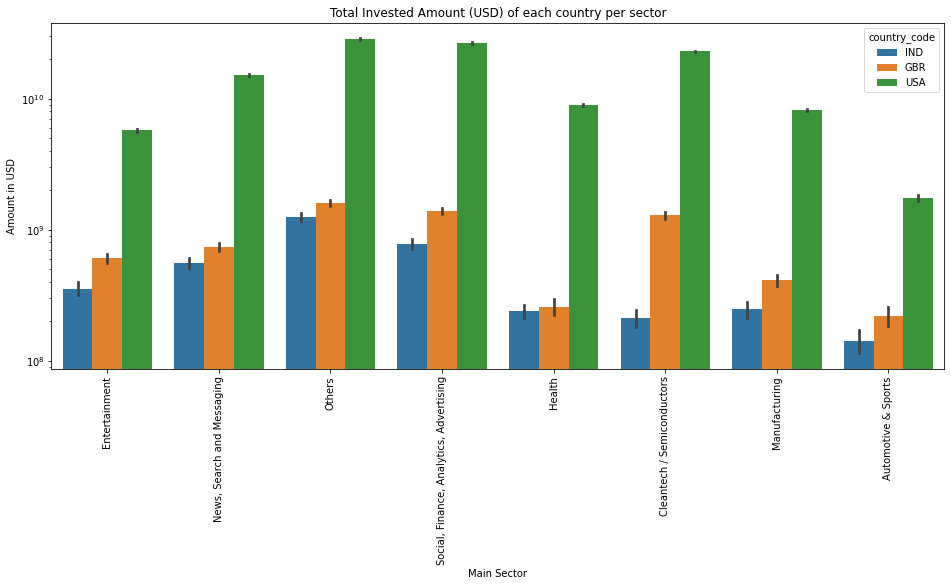

In [119]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16,14))

plt.subplot(2,1,1)
sector_nd_amount_per_country =sb.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=master_frame, estimator =np.sum)
sector_nd_amount_per_country.set_xticklabels(sector_nd_amount_per_country.get_xticklabels(), rotation = 90)
sector_nd_amount_per_country.set(xlabel="Main Sector", ylabel = "Amount in USD")

### Using log scale to see the bars very clearly to analyse the top invested sectors by country easily
sector_nd_amount_per_country.set_yscale("log")

plt.title("Total Invested Amount (USD) of each country per sector")
plt.show()

NameError: name 'q' is not defined

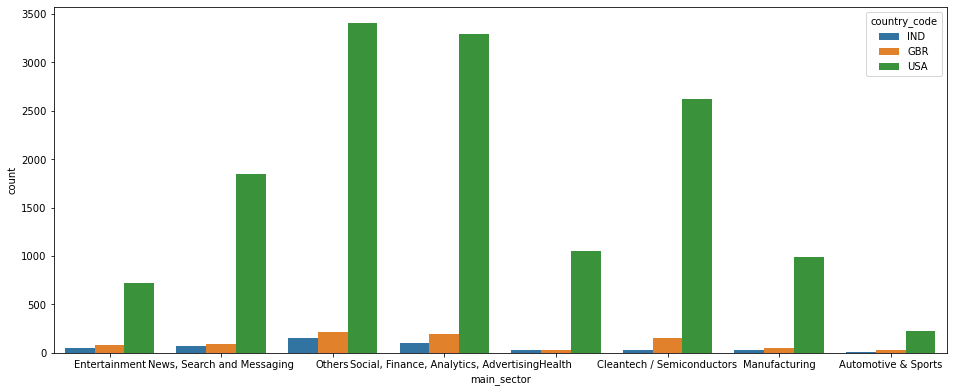

In [120]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
sector_nd_count_per_country = sb.countplot(x='main_sector', hue ='country_code', data =master_frame)
sector_nd_count_per_country.set_xticklabels(q.get_xticklabels(), rotation = 90)
sector_nd_count_per_country.set(xlabel="Main Sector", ylabel = "Count")
plt.title("Number of Investments for each country per sector")

plt.show()

# Hence based on the analysis and observations following are derived

## SparksFunds should invest in :-
## Funding type : `Venture`
## Countries : `USA, GBR, IND`
## Top two sectors to invest in are 
   ###  1. `Others` 
   ###  2. `Social, Finance, Analytics, Advertising`
### If `Others` is not considered then company can choose `Cleantech/Semiconductors`  as next option to invest since these are the top invested companies by top 3 english speaking countries